In [2]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 949.3/949.3 kB 33.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 59.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 53.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 40.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 10.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 81.2 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstall

In [3]:
from ultralytics import YOLO
import cv2
from google.colab.patches import cv2_imshow
import folium
from geopy.geocoders import Nominatim

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [4]:
model = YOLO("yolov8n.pt")

100%|██████████| 6.25M/6.25M [00:00<00:00, 308MB/s]


In [11]:
results = model("/content/ff.jpg")


image 1/1 /content/ff.jpg: 480x640 2 persons, 1 truck, 3 horses, 6 cows, 223.1ms
Speed: 7.6ms preprocess, 223.1ms inference, 6.2ms postprocess per image at shape (1, 3, 480, 640)


In [12]:
image = cv2.imread("/content/ff.jpg")

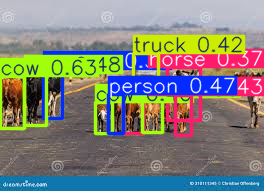

In [13]:
results[0].show()

In [ ]:
animal_classes = [17, 19, 20]  ### To detect only Animals
herd_detected = False

latitude, longitude = 33.6844, 73.0479

for result in results:
    count = 0
    for box in result.boxes:
        class_id = int(box.cls.item())

        if class_id in animal_classes:
            count += 1
            x1, y1, x2, y2 = map(int, box.xyxy[0])
            label = f"{model.names[class_id]}"

            cv2.rectangle(image, (x1, y1), (x2, y2), (0, 255, 0), 3)
            cv2.putText(image, label, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 255, 0), 2)

    if count >= 5:
        herd_detected = True
        print(f"Herd detected with {count} animals!")


Herd detected with 9 animals!


Herd location marked on map! Open 'herd_map.html' to view.


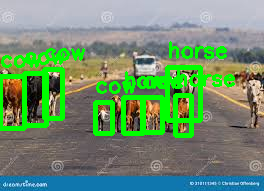

In [16]:
cv2.imwrite("herd_detected.jpg", image)

if herd_detected:
    herd_map = folium.Map(location=[latitude, longitude], zoom_start=15)

    folium.Marker(
        location=[latitude, longitude],
        popup="Herd Detected",
        icon=folium.Icon(color="red", icon="info-sign")
    ).add_to(herd_map)

    herd_map.save("herd_map.html")
    print("Herd location marked on map! Open 'herd_map.html' to view.")

cv2_imshow(image)
cv2.waitKey(0)
cv2.destroyAllWindows()
